# Get Loss

In [68]:
import os
import matplotlib.pyplot as plt
s = 720000 / 2856


In [265]:
OUT = '/home/max/mrcnn_b_work/OUT/'
#OUT = '/data/proj/smFISH/Students/Max_Senftleben/files/models/20190408_resx-152_offline/'
#OUT = '/home/maxsen/git/master_thesis/out/'
print(os.listdir(OUT))
out_file = '20190424_changelr_0001_nuclei.out'
#out_file = 'log.txt'
out_file2 = '20190313_offline_augment_continue.out'
print(OUT + out_file)
lines_loss = [line for line in open(OUT + out_file) if line.startswith('2019-0') and line.split()[2] == 'maskrcnn_benchmark.trainer' and line.split()[4] == 'eta:']
lines_loss2 = [line for line in open(OUT + out_file2) if line.startswith('2019-0') and line.split()[2] == 'maskrcnn_benchmark.trainer' and line.split()[4] == 'eta:']
#lines_loss = lines_loss + lines_loss2

['jupyter.log', 'jupyter.out', 'jupyter.error', 'test_myjob.log', 'test_myjob.out', 'test_myjob.error', 'nuclei_test.log', 'nuclei_test.out', 'nuclei_test.error', 'nuclei_test_4.log', 'nuclei_test_4.out', 'nuclei_test_4.error', 'nuclei_resized.log', 'nuclei_resized.out', 'nuclei_resized.error', 'nuclei_resized_new.log', 'nuclei_resized_new.out', 'nuclei_resized_new.error', 'coco_or.log', 'coco_or.out', 'coco_or.error', 'nuclei_nonorm.log', 'nuclei_nonorm.out', 'nuclei_nonorm.error', '20190304_nonorm.log', '20190304_nonorm.out', '20190304_nonorm.error', '.ipynb_checkpoints', '20190306_raw_and_all.log', '20190306_raw_and_all.out', '20190306_raw_and_all.error', '20190308_comb_popped.log', '20190308_comb_popped.out', '20190308_comb_popped.error', '20190310_offline_augment.log', '20190310_offline_augment.out', '20190310_offline_augment.error', '20190313_offline_augment_continue.log', '20190313_offline_augment_continue.out', '20190313_offline_augment_continue.error', '20190315_poly_t_offline

### one line
2019-02-21 15:32:52,678 maskrcnn_benchmark.trainer INFO: eta: 22:59:49  iter: 384020  loss: 0.0335 (0.1234)  loss_classifier: 0.0055 (0.0265)  loss_box_reg: 0.0033 (0.0149)  loss_mask: 0.0254 (0.0720)  loss_objectness: 0.0000 (0.0073)  loss_rpn_box_reg: 0.0003 (0.0027)  time: 0.2530 (0.2464)  data: 0.0052 (0.0066)  lr: 0.002500  max mem: 2280

In [266]:
import matplotlib.pyplot as plt
import os
ROOT = '/home/max/'
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 20, 12
print(os.listdir(ROOT))

['.bash_logout', '.bash_profile', '.bashrc', '.ssh', '.config', '.bash_history', 'github', '.pki', 'anaconda3', '.bashrc-anaconda3.bak', '.conda', '.cache', '.ipython', '.keras', '.nv', '.python_history', '.jupyter', '.local', 'submit_jupyter', '.torch', '.gitconfig', 'downloads', 'gcc-5.2.0', 'objdir', 'submit_jupyter_gpu', 'submit_jupyter_gpu_matter', 'Untitled.ipynb', '.ipynb_checkpoints', 'mrcnn_b_work', 'local_dir2monod.rsync.log', 'out_nuclei_r101.txt', 'inference', 'out_nuclei_r152.txt', 'out_nuclei_r50.txt', 'out_polyt_r50.txt', 'out_polyt_r101.txt', 'out_polyt_r152.txt']


In [270]:
def eval_vali(fil, iterat, loss):
    with open(fil) as op:
        all_lines = [i for i in op]
    
    model = [i.split('/')[-1] for i in all_lines if i.startswith('  WEIGHT: /data')]
    models2 = []
    for i in model:
        sd = i.split('_')[-1].split('.')[0]
        if sd == 'final':
            models2.append(720000)
        elif sd == 'trimmed':
            continue        
        else:
            models2.append(int(sd))
    #model = [int(i.split('_')[-1].split('.')[0]) for i in model]
    av_iou = [float(i.split()[-1]) for i in all_lines if i.startswith('average IoU all')]
    av_ap = [float(i.split()[-1]) for i in all_lines if i.startswith(' Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100')]
    av_ap2 = [float(i.split()[-1]) for i in all_lines if i.startswith(' Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100')]
    print(len(av_iou), len(av_ap), len(models2))
            
    avs_ap2 = []
    avs_iou = []
    avs_ap = []
    models = []
    for i in range(len(models2)-26):
        models.append(models2[i])
        #models.append(model[i])
        #avs_iou.append(av_iou[i*2])
        avs_iou.append((av_iou[i*2+1] + av_iou[i*2])/2)
        #avs_ap.append(av_ap[i*2])
        avs_ap.append((av_ap[i*2+1] + av_ap[i*2])/2)
        avs_ap2.append((av_ap2[i*2+1] + av_ap2[i*2])/2)
    ap_max = 0
    iou_max = 0
    it_max = 0
    ap2_max  = 0
    for i in range(len(avs_iou)):
        if avs_ap[i]>ap_max:
            iou_max = avs_iou[i]
            it_max = models[i]
            ap_max = avs_ap[i]
            ap2_max = avs_ap2[i]
    print(it_max)
    print(iou_max, max(avs_iou))
    print(ap_max)
    print(ap2_max)
    #print(models)
    #print(avs_iou)
    plt.plot(models, avs_iou, models, avs_ap, models, avs_ap2, iterat, loss)
    #plt.ylim(0.4, 0.65)
    plt.show()
    #print(avs_iou)
    #print(models)

In [271]:
losses = []
iterations = []
eta = []
indexes = []
lr = []
loss_classifier = []
loss_box_reg = []
loss_mask = []
loss_objectness = []
loss_rpn_box_reg = []

days_to_hours = {}
for i in range(11):
    days_to_hours[i] = i * 24
    
for i, one_line in enumerate(lines_loss):
    elements = one_line.split()
    indexes.append(i)
    if len(elements) == 39:
        
        losses.append(float(elements[11]))
        iterations.append(int(elements[9]))
        lr.append(float(elements[35]))
        time = days_to_hours[int(elements[5])] + int(elements[7].split(':')[0])
        eta.append(time)
        loss_classifier.append(float(elements[14]))
        loss_box_reg.append(float(17))
        loss_mask.append(float(20))
        loss_objectness.append(float(23))
        loss_rpn_box_reg.append(float(26))
        
    elif len(elements) == 37:
        
        losses.append(float(elements[9]))
        iterations.append(int(elements[7]))
        lr.append(float(elements[33]))
        time = int(elements[5].split(':')[0])
        eta.append(time)
        loss_classifier.append(float(elements[12]))
        loss_box_reg.append(float(15))
        loss_mask.append(float(18))
        loss_objectness.append(float(21))
        loss_rpn_box_reg.append(float(24))
        
norm_time = [(max(eta) - i) for i in eta]
norm_iterations = [i / 100000 for i in iterations]
print(min(losses))

0.0183


538 538 270
2500
0.5334227538652111 0.620437365622577
0.2855
0.5225


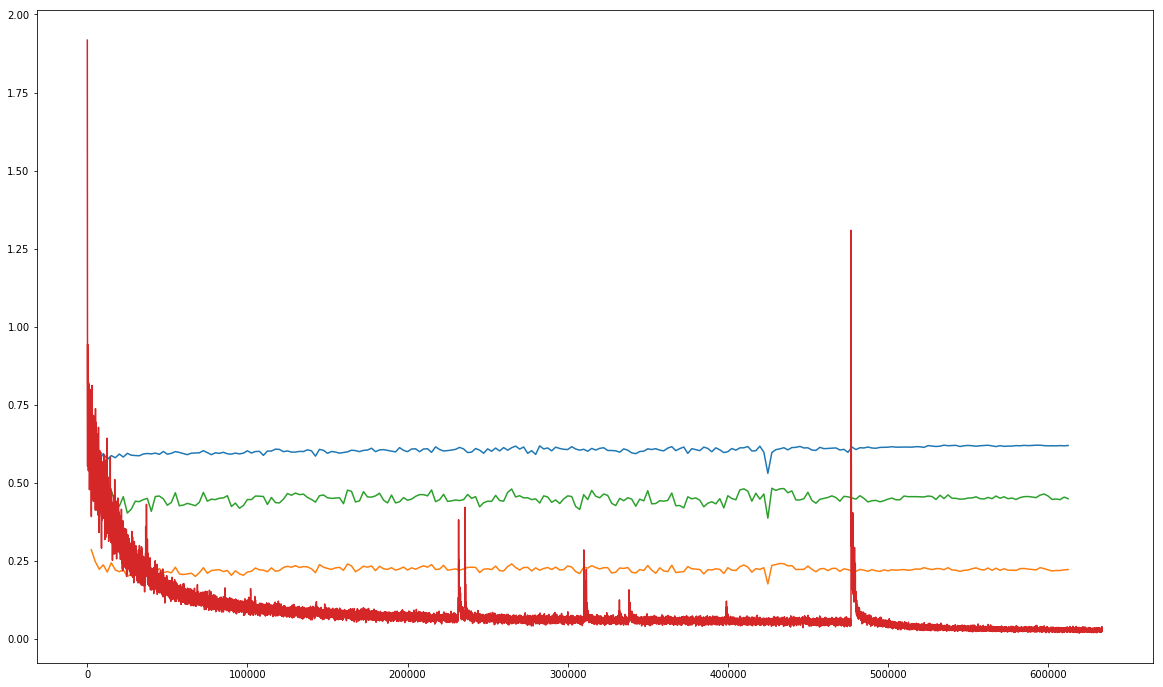

'\nplt.figure()\n\nplt.plot(norm_iterations, losses)\nplt.ylabel(\'Loss\')\nplt.xlabel(\'Iterations\')\nplt.xlim()\nplt.ylim()\n\nplt.title("Loss")\n###plt.savefig(\'/home/max/github/ms2/loss_polyt.png\')\nplt.show()\n'

In [272]:
eval_vali(ROOT + 'out_polyt_r152.txt', iterations, losses)
'''
plt.figure()

plt.plot(norm_iterations, losses)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.xlim()
plt.ylim()

plt.title("Loss")
###plt.savefig('/home/max/github/ms2/loss_polyt.png')
plt.show()
'''

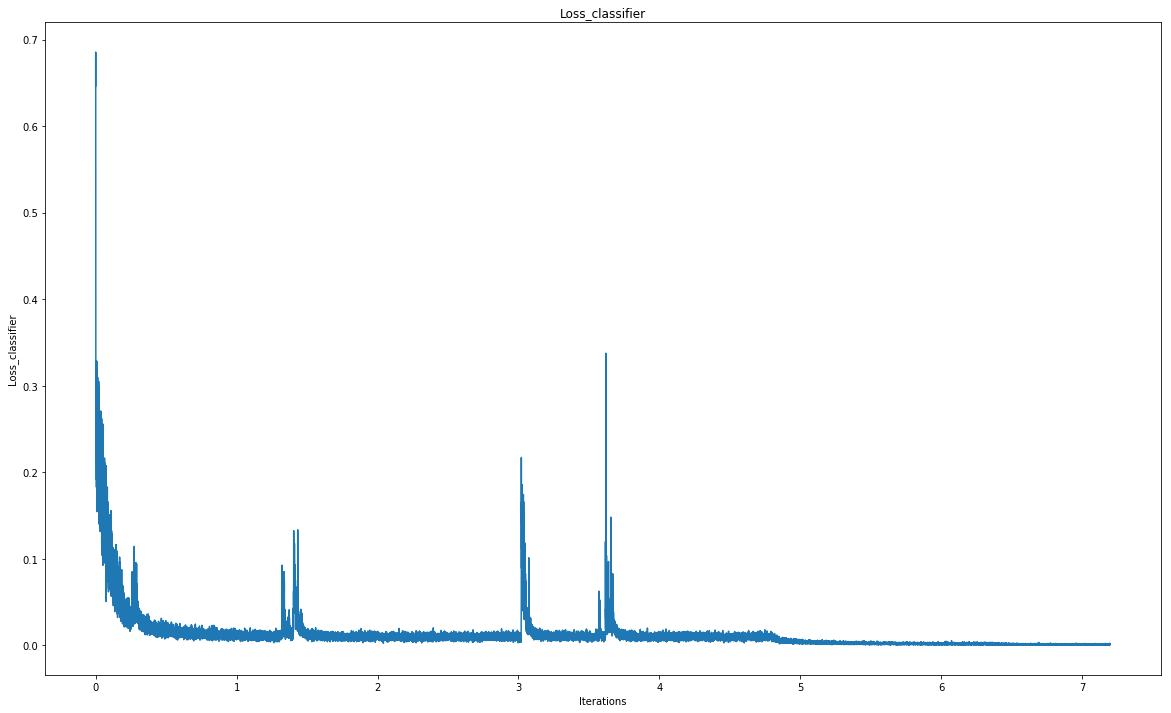

In [257]:
plt.figure()

plt.plot(norm_iterations, loss_classifier)
plt.ylabel('Loss_classifier')
plt.title('Loss_classifier')
plt.xlim()
plt.xlabel('Iterations')
plt.show()

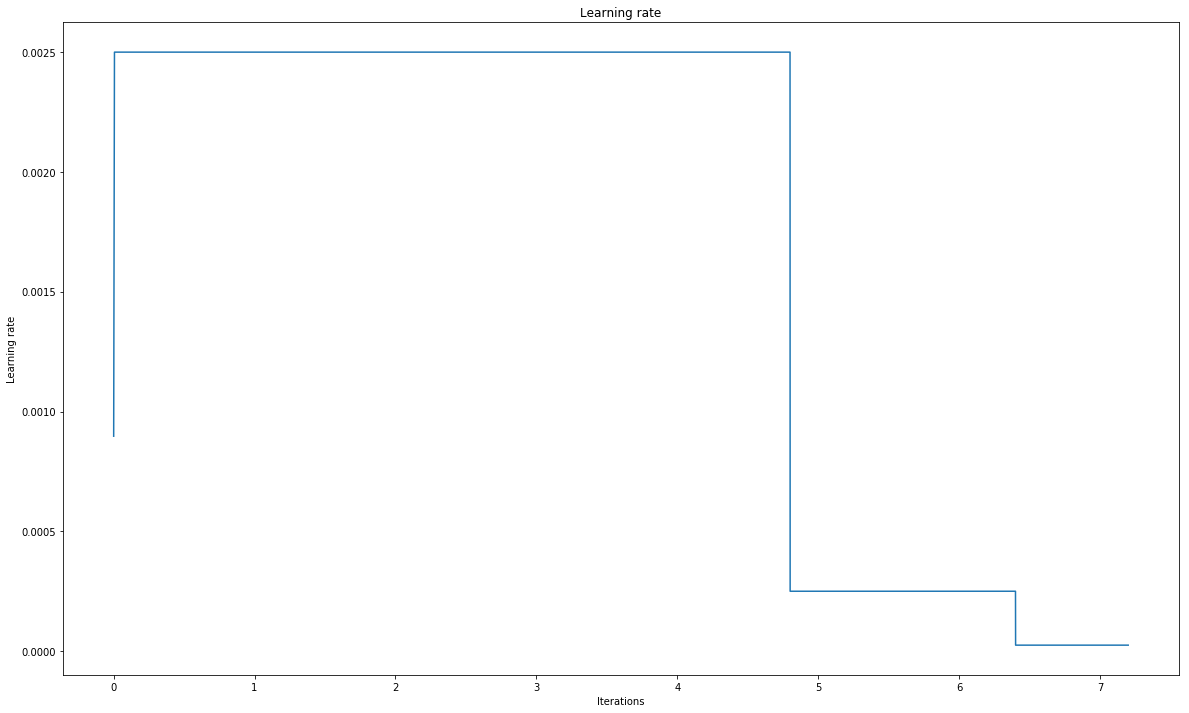

In [258]:
plt.figure()

plt.plot(norm_iterations, lr)

plt.ylabel('Learning rate')
plt.xlabel('Iterations')
plt.title("Learning rate")
plt.show()

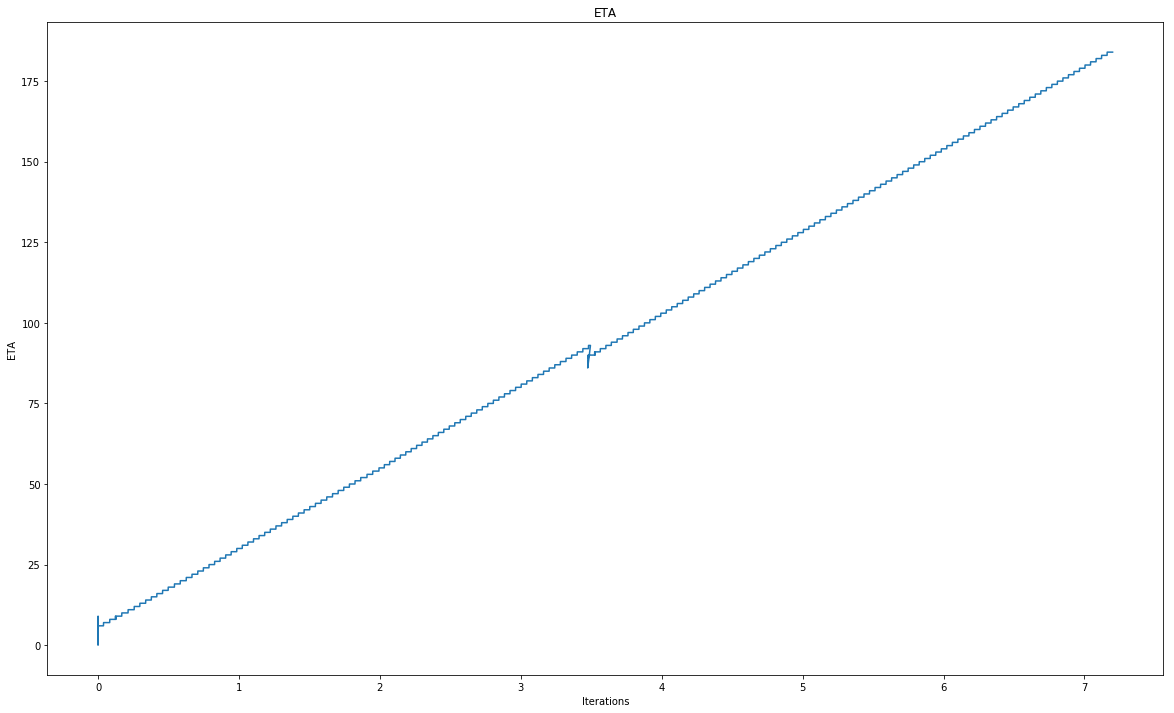

In [259]:
plt.figure()

plt.plot(norm_iterations, norm_time)
plt.ylabel('ETA')
plt.xlabel('Iterations')
plt.title("ETA")
plt.show()

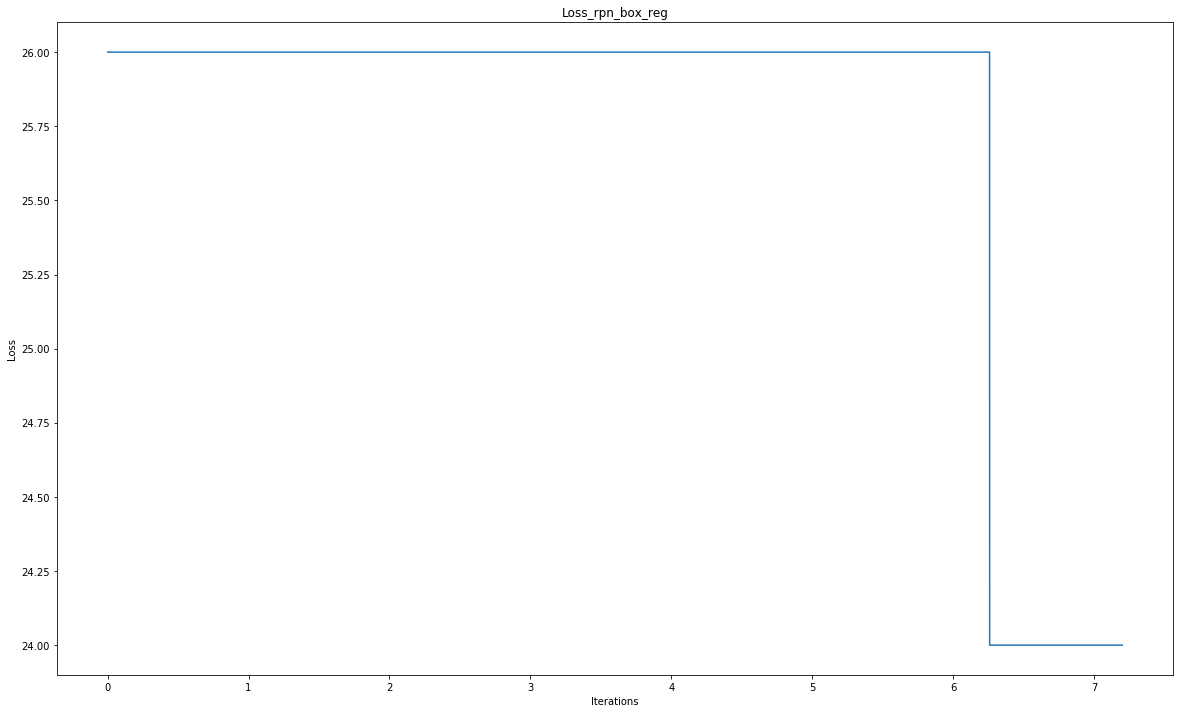

In [260]:
plt.figure()

plt.plot(norm_iterations, loss_rpn_box_reg)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title("Loss_rpn_box_reg")
plt.show()

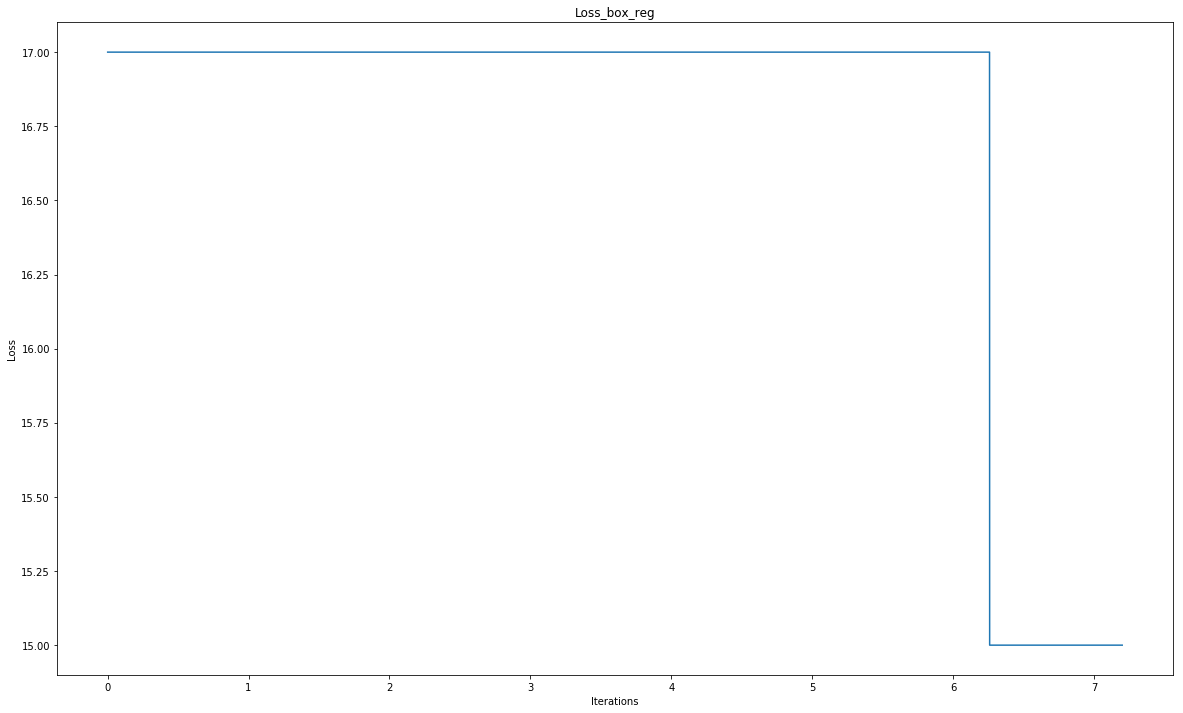

In [261]:
plt.figure()

plt.plot(norm_iterations, loss_box_reg)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Loss_box_reg')
plt.show()

In [262]:
# cp file
models = '/data/proj/smFISH/Students/Max_Senftleben/files/models/20190306_coco_complete_popped/'
print(os.listdir(models))

['log.txt', 'model_0002500.pth', 'last_checkpoint', 'model_0005000.pth', 'model_0007500.pth', 'model_0010000.pth', 'model_0012500.pth', 'model_0015000.pth', 'model_0017500.pth', 'model_0020000.pth', 'model_0022500.pth', 'model_0025000.pth', 'model_0027500.pth', 'model_0030000.pth', 'model_0032500.pth', 'model_0035000.pth', 'model_0037500.pth', 'model_0040000.pth', 'model_0042500.pth', 'model_0045000.pth', 'model_0047500.pth', 'model_0050000.pth', 'model_0052500.pth', 'model_0055000.pth', 'model_0057500.pth', 'model_0060000.pth', 'model_0062500.pth', 'model_0065000.pth', 'model_0067500.pth', 'model_0070000.pth', 'model_0072500.pth', 'model_0075000.pth', 'model_0077500.pth', 'model_0080000.pth', 'model_0082500.pth', 'model_0085000.pth', 'model_0087500.pth', 'model_0090000.pth', 'model_0092500.pth', 'model_0095000.pth', 'model_0097500.pth', 'model_0100000.pth', 'model_0102500.pth', 'model_0105000.pth', 'model_0107500.pth', 'model_0110000.pth', 'model_0112500.pth', 'model_0115000.pth', 'mo